In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [4]:
## 
df_tr = pd.read_csv('../data/data5_tr.csv', index_col=0)
df_pca = pd.read_csv('../data/pca5_99.csv', index_col=0)

df_tr.head()
df_pca.head()

,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS PITP,2FGM %UAST,3FGM %UAST,3P%,3PA,AST,...,PF,PIE,PITP,PTS,STL,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 96,0.793058,-1.287762,0.099520,0.613132,0.411805,-0.910112,0.799385,-1.407574,-1.106888,-1.325759,...,-1.048065,0.023866,-0.518950,-1.282815,-0.046262,1.108455,-1.497210,-0.225351,-1.482877,0.572197
Aaron McKie 96,-0.361463,0.685454,0.959510,0.581281,-0.369327,0.837207,0.703941,0.928161,0.194981,0.521763,...,-0.133620,-0.075180,-0.839812,-1.059881,1.436727,-0.182287,0.149440,-0.203836,-0.988627,-0.829306
Adam Keefe 96,-0.530006,-1.556645,0.803148,2.014586,0.824689,-1.614676,-1.160535,-1.743168,-1.386675,-1.095233,...,0.724928,-0.471364,-0.198087,-1.179922,0.292941,-1.231199,-0.290031,0.828880,-1.359314,-1.467881
Allan Houston 96,0.641369,0.857355,-0.119386,-0.469810,-1.150458,0.149553,1.025554,0.840906,0.971845,-0.130121,...,0.082185,-0.636440,-0.839812,0.517808,-1.494132,1.385890,0.450403,-0.053232,0.576497,0.980079
Allen Iverson 96,-0.597424,0.628982,0.896965,0.613132,-0.090351,1.513589,1.577214,0.545583,0.957951,1.514393,...,-0.522589,0.321004,0.789182,1.426694,1.436727,1.919990,2.161009,-0.440501,1.873902,1.904578


,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20
A.C. Green 96,2.287779,-0.759765,-0.834037,1.050590,-1.718330,-1.916075,1.252969,1.065771,0.979718,0.915659,...,0.675848,1.228399,0.458374,-0.416791,1.676291,-0.990458,-0.584492,0.823748,-0.724647,0.481390
Aaron McKie 96,-1.192152,-1.511924,2.000425,1.073580,-2.243787,0.901805,-0.960046,0.580025,-0.898222,-0.054286,...,1.012674,0.607203,-0.687582,0.644480,0.332182,-0.003901,0.794640,-0.175964,-0.284277,0.399521
Adam Keefe 96,4.181718,-1.008846,1.456615,0.120232,-1.836368,1.865487,0.317185,1.764423,1.400195,-0.198825,...,-0.231987,0.440559,0.069942,-0.929534,0.260261,0.291254,-0.309070,0.791160,-0.309387,0.324932
Allan Houston 96,-2.736333,-0.400689,-0.163893,2.395374,0.431180,0.222615,0.213837,0.315904,-1.951599,0.143267,...,-1.030565,-0.808761,-0.123703,-0.007744,0.378603,-0.247842,-0.416368,0.373467,0.063328,0.108679
Allen Iverson 96,-4.281216,4.102108,0.498579,-2.292836,-0.651280,-2.075754,0.592680,0.082731,-1.040444,0.630842,...,-0.555578,-0.893531,0.460126,-0.333656,-0.471491,-0.389636,-0.269894,0.067716,0.066357,0.083951


## Clustering PCA data

## Determine best number of clusters

Wall time: 2min 11s


Text(0.5, 0, 'Number components')

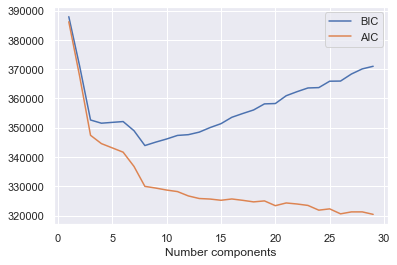

In [5]:
%%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_pca) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_pca) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_pca) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

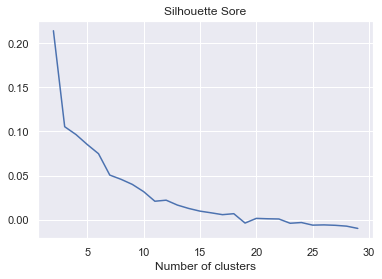

In [31]:
## evaluate silhoutte score for each model

labels = {n: model.predict(df_pca) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df_pca, labels[n], random_state=seed) for n in range_n_components[1:]]
sns.lineplot(x=range_n_components[1:], y=silhoutte_scores, )
plt.plot(range_n_components[1:], silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

In [24]:
len(silhoutte_scores)
len(range_n_components[1:])

28

28

In [ ]:
## Build EM GMM

gmm = GaussianMixture(n_components=15, covariance_type='full', random_state=seed)
gmm.fit(df_pca)

hard_labels = gmm.predict(df_pca)
soft_labels = gmm.predict_proba(df_pca)
df_clusters = pd.DataFrame(hard_labels, index=df_pca.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_pca_clusters[soft_cols] = soft_labels
df_pca_clusters.head()

## CLustering Non PCA Data

### Determing number of clusters

Wall time: 3min 11s


Text(0.5, 0, 'Number components')

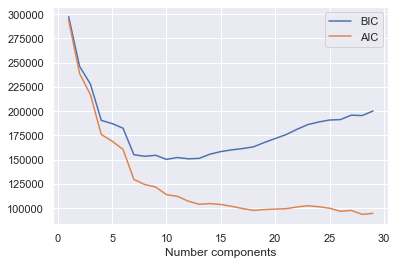

In [32]:
%%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_tr) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_tr) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_tr) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');

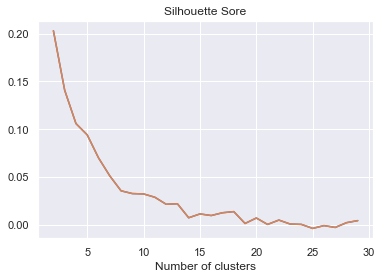

In [33]:
## evaluate silhoutte score for each model

labels = {n: model.predict(df_tr) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df_tr, labels[n], random_state=seed) for n in range_n_components[1:]]
sns.lineplot(x=range_n_components[1:], y=silhoutte_scores)
plt.plot(range_n_components[1:], silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

In [ ]:
## Build EM GMM 

gmm = GaussianMixture(n_components=15, covariance_type='full', random_state=seed)
gmm.fit(df_tr)


hard_labels = gmm.predict(df_tr)
soft_labels = gmm.predict_proba(df_tr)
df_clusters = pd.DataFrame(hard_labels, index=df_tr.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_tr_clusters[soft_cols] = soft_labels
df_tr_clusters.head()

## Checking if BIC/AIC are higher when PCA has all principal components

In [48]:
df_pca_allpc = pd.read_csv('../data/data5_tr.csv', index_col=0)
pca = PCA(n_components=len(df_pca_allpc.columns))
df_pca_allpc = pd.DataFrame(pca.fit_transform(df_pca_allpc), index=df_pca_allpc.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca_allpc.to_csv('../data/pca5_allpc.csv')

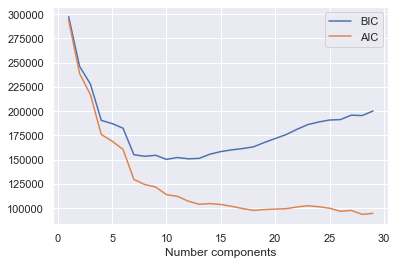

In [51]:
## compare plot to plots for pca99 and aboce non-pca data
# %%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_pca_allpc) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_pca_allpc) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_pca_allpc) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');


### Interesting, the full pca transform (all principal components) is much closer to the full data...

### Checking for 99.9 explained variance

In [ ]:
## check results with 99.9 percent of explained variance for principal components
df_pca_999 = pd.read_csv('../data/data5_tr.csv', index_col=0)
pca = PCA(0.999)
pca.fit(df_pca_999)
df_pca_999 = pd.DataFrame(pca.fit_transform(df_pca_999), index=df_pca_999.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca_999.to_csv('../data/pca5_999.csv')

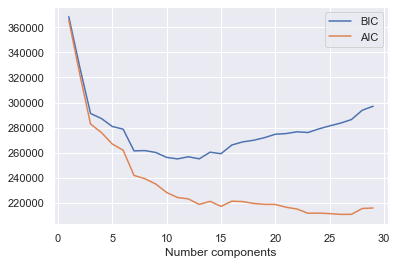

In [52]:
## compare plot to plots for pca99 and aboce non-pca data
# %%time

range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df_pca_999) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df_pca_999) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df_pca_999) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');


## Why does AIC and BIC spike so much??

# Moving forward with full pca 99.9

In [63]:
df = pd.read_csv('../data/pca5_999.csv', index_col=0)
df.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26
A.C. Green 96,2.287779,-0.759765,-0.834037,1.050590,-1.718330,-1.916075,1.252969,1.065771,0.979718,0.915659,...,-0.584492,0.823748,-0.724647,0.481390,-0.136918,-0.211329,0.121890,0.037792,0.016402,0.000390
Aaron McKie 96,-1.192152,-1.511924,2.000425,1.073580,-2.243787,0.901805,-0.960046,0.580025,-0.898222,-0.054286,...,0.794640,-0.175964,-0.284277,0.399521,0.367250,0.144573,0.081069,-0.088420,-0.008945,-0.037077
Adam Keefe 96,4.181718,-1.008846,1.456615,0.120232,-1.836368,1.865487,0.317185,1.764423,1.400195,-0.198825,...,-0.309070,0.791160,-0.309387,0.324932,-0.113978,0.012834,-0.184439,-0.076646,0.108575,0.224924
Allan Houston 96,-2.736333,-0.400689,-0.163893,2.395374,0.431180,0.222615,0.213837,0.315904,-1.951599,0.143267,...,-0.416368,0.373467,0.063328,0.108679,0.040139,-0.053475,-0.059407,0.145331,-0.052515,-0.056696
Allen Iverson 96,-4.281216,4.102108,0.498579,-2.292836,-0.651280,-2.075754,0.592680,0.082731,-1.040444,0.630842,...,-0.269894,0.067716,0.066357,0.083951,-0.765331,-0.021602,0.061309,0.012433,0.025332,0.003759


In [64]:
df['pc_0'].sort_values()[0:15]

Stephen Curry 15       -6.114147
Stephen Curry 13       -6.019039
Stephen Curry 14       -6.014216
Stephen Curry 12       -5.835357
Russell Westbrook 16   -5.699546
Allen Iverson 04       -5.675673
Trae Young 19          -5.667161
Stephen Curry 16       -5.644541
James Harden 18        -5.628616
Steve Nash 07          -5.610776
Jason Williams 01      -5.548691
Jason Williams 02      -5.541454
Darrell Armstrong 99   -5.486647
Damian Lillard 19      -5.449913
Isaiah Thomas 16       -5.412290
Name: pc_0, dtype: float64

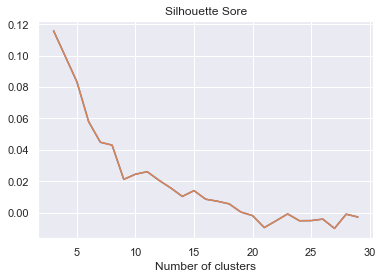

In [65]:
## evaluate silhoutte score for each model fit to pca5_999

range_n_components = np.arange(2,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]

labels = {n: model.predict(df) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df, labels[n], random_state=seed) for n in range_n_components[1:]]
sns.lineplot(x=range_n_components[1:], y=silhoutte_scores, )
plt.plot(range_n_components[1:], silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

In [66]:
## Build EM GMM 

gmm = GaussianMixture(n_components=15, covariance_type='full', random_state=seed)
gmm.fit(df)


hard_labels = gmm.predict(df)
soft_labels = gmm.predict_proba(df)
df_clusters = pd.DataFrame(hard_labels, index=df.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters.head()

GaussianMixture(n_components=15, random_state=3)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 96,13,0.000000e+00,0.000000e+00,0.000000e+00,1.128349e-07,3.167037e-17,0.000000e+00,0.000000e+00,3.869033e-116,4.997198e-12,0.000000,0.000000e+00,0.000000e+00,2.641405e-213,9.999999e-01,0.000000e+00
Aaron McKie 96,6,6.218571e-02,0.000000e+00,1.501419e-12,1.114706e-08,1.190061e-36,2.778384e-27,9.378143e-01,9.222730e-30,2.787733e-87,0.000000,1.258284e-17,1.657909e-11,3.400301e-58,2.261167e-115,0.000000e+00
Adam Keefe 96,9,0.000000e+00,7.440951e-07,0.000000e+00,9.617004e-20,1.415035e-50,0.000000e+00,0.000000e+00,5.118668e-183,1.368915e-35,0.999999,0.000000e+00,0.000000e+00,0.000000e+00,2.126583e-15,1.989364e-22
Allan Houston 96,11,2.250775e-05,0.000000e+00,6.121695e-40,2.208483e-24,7.928765e-60,2.941291e-01,2.761815e-19,1.517405e-13,8.112418e-89,0.000000,1.227509e-11,7.056854e-01,1.630336e-04,9.660972e-211,0.000000e+00
Allen Iverson 96,2,1.250457e-63,0.000000e+00,9.963229e-01,1.331948e-11,7.494188e-14,1.885173e-55,1.712967e-12,2.075129e-05,5.089532e-42,0.000000,2.131171e-89,3.656300e-03,2.279034e-31,1.725320e-70,0.000000e+00


In [67]:
df_clusters['label'].value_counts()

9     1396
5      741
11     653
2      560
10     528
6      510
1      509
14     410
12     367
0      350
4      329
7      312
3      266
8      221
13      94
Name: label, dtype: int64

In [68]:
## Sample each cluster

for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(15)['label'])
    print('\n\n')

label: 0 total: 350
Jon Barry 03              0
John Salmons 11           0
Robert Horry 02           0
Jason Williams 02         0
Steve Kerr 97             0
Anthony Johnson 03        0
Matthew Dellavedova 19    0
Carlos Arroyo 10          0
Jason Williams 04         0
Erick Strickland 00       0
Howard Eisley 99          0
Casey Jacobsen 02         0
Chris Childs 96           0
Darrell Arthur 14         0
Dennis Scott 98           0
Name: label, dtype: int64



label: 1 total: 509
Jonathan Bender 02        1
Carlos Rogers 96          1
Shaun Livingston 04       1
Darrell Arthur 13         1
Richard Hamilton 11       1
Andre Miller 12           1
Jared Jeffries 09         1
Josh Howard 09            1
Vincent Yarbrough 02      1
Johnny O'Bryant III 15    1
Kenny Thomas 00           1
Jerome Kersey 97          1
Trevor Ariza 04           1
Flip Murray 06            1
Michael Curry 99          1
Name: label, dtype: int64



label: 2 total: 560
Mitch Richmond 00    2
Gilbert Arenas 01  

In [70]:
## with n clusters = 18
players  = ['Allen Iverson',
            'Stephon Marbury',
            'John Stockton',
            'Gilbert Arenas',
            'Chris Paul',
            'Jamal Crawford',
            'Lou Williams',
            'Derek Fisher'
            'Kobe Bryant',
            'LeBron James',
            'Tracy McGrady',
            'Paul Pierce',
            'Dirk',
            "Shaquille O'Neal",
            'Tim Duncan',
            'Dwight Howard',
            'Draymond Green',
            'Steph Curry',
            'Klay Thompson',
            'Eddie House',
            'Peja',
            'Jameer Nelson',
            'Ray Allen',
            'Kevin Garnett',
            'Deandre Jordan',
            'Paul George',
            'James Harden',
            'Giannis'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

Allen Iverson 96    2
Allen Iverson 97    4
Allen Iverson 98    7
Allen Iverson 99    7
Allen Iverson 00    7
Allen Iverson 01    7
Allen Iverson 02    7
Allen Iverson 03    7
Allen Iverson 04    7
Allen Iverson 05    7
Allen Iverson 06    7
Allen Iverson 07    7
Allen Iverson 08    7
Allen Iverson 09    4
Name: label, dtype: int64
Stephon Marbury 96    11
Stephon Marbury 97     2
Stephon Marbury 98     2
Stephon Marbury 99     7
Stephon Marbury 00     7
Stephon Marbury 01     7
Stephon Marbury 02     7
Stephon Marbury 03     2
Stephon Marbury 04     7
Stephon Marbury 05     7
Stephon Marbury 06    11
Stephon Marbury 07    11
Name: label, dtype: int64
John Stockton 96    2
John Stockton 97    2
John Stockton 98    4
John Stockton 99    2
John Stockton 00    2
John Stockton 01    4
John Stockton 02    4
Name: label, dtype: int64
Gilbert Arenas 01     2
Gilbert Arenas 02     2
Gilbert Arenas 03    11
Gilbert Arenas 04    11
Gilbert Arenas 05     7
Gilbert Arenas 06     7
Gilbert Arenas 0

In [93]:
df_clusters = df_clusters.round(2)

In [96]:
## see players with multiple cluster probabilities
df_multi_clusters = df_clusters[(df_clusters.iloc[:, 1:] < 0.9).all(axis=1)]
df_multi_clusters.head()

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
Allan Houston 96,11,0.00,0.0,0.00,0.00,0.00,0.29,0.00,0.0,0.0,0.0,0.0,0.71,0.0,0.0,0.0
Chris Carr 96,11,0.00,0.0,0.00,0.00,0.00,0.00,0.41,0.0,0.0,0.0,0.0,0.59,0.0,0.0,0.0
Derek Harper 96,2,0.12,0.0,0.75,0.00,0.00,0.00,0.13,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Eric Piatkowski 96,5,0.00,0.0,0.00,0.00,0.00,0.50,0.00,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0
George Lynch 96,4,0.00,0.0,0.00,0.13,0.87,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [ ]:
## see if anyone has assignment to star cluste 7 and elsewhere

In [102]:
df_multi_clusters[df_multi_clusters['cluster_7'] > .1].sort_values('cluster_7', ascending=False)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
Khris Middleton 17,7,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.87,0.00,0.0,0.0,0.13,0.00,0.0,0.0
Jerry Stackhouse 99,7,0.0,0.0,0.00,0.00,0.13,0.0,0.0,0.87,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Brandon Roy 07,7,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.86,0.00,0.0,0.0,0.00,0.14,0.0,0.0
Glenn Robinson 01,7,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.86,0.14,0.0,0.0,0.00,0.00,0.0,0.0
Michael Redd 07,7,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.85,0.00,0.0,0.0,0.00,0.15,0.0,0.0
Vince Carter 07,7,0.0,0.0,0.15,0.00,0.00,0.0,0.0,0.85,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Chris Paul 10,7,0.0,0.0,0.15,0.00,0.00,0.0,0.0,0.85,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Allen Iverson 06,7,0.0,0.0,0.00,0.00,0.16,0.0,0.0,0.84,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Sam Cassell 05,7,0.0,0.0,0.16,0.00,0.00,0.0,0.0,0.84,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Brandon Roy 10,7,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.83,0.00,0.0,0.0,0.00,0.17,0.0,0.0


In [105]:
## Writing out cluster df
df_clusters.to_csv('../data/clusters_gmm5.csv')

In [107]:
## number of players at diff multi label thresholds
df_clusters[(df_clusters.iloc[:, 1:] < 0.75).all(axis=1)].shape
df_clusters[(df_clusters.iloc[:, 1:] < 0.60).all(axis=1)].shape
df_clusters[(df_clusters.iloc[:, 1:] < 0.5).all(axis=1)].shape

(270, 16)

(103, 16)

(13, 16)